## Receiver Operating Characteristic (ROC) Curve Between Models

In [1]:
# Importing libraries required
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import cycle
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
SEED = 42
np.random.seed(SEED)

### Data Preparation
#### Loading the Data

In [2]:
# Load the dataset
df_bl = pd.read_csv("baseline_data.csv")

#### Pick relevant features

In [3]:
#pick features for Baseline Model
baseline_features = ['latitude','longitude','success','suicide','attacktype1','targtype1','claimed','nkill','nkillus','nkillter','nwound','nwoundus','ishostkid']

#### Map Labels

In [4]:
# Update gname(Terrorist Organization) column to numerical
df_bl['gname'] = df_bl['gname'].map({'Islamic State of Iraq and the Levant (ISIL)':0,'Taliban':1,'Taliban (Pakistan)':1,'Boko Haram':2,'Al-Qaida':3,'Al-Qaida in Iraq':3,'Al-Qaida in Saudi Arabia':3,'Al-Qaida in the Arabian Peninsula (AQAP)':3,'Al-Qaida in the Islamic Maghreb (AQIM)':3,'Al-Qaida in Yemen':3,'Al-Qaida Kurdish Battalions (AQKB)':3,'Al-Shabaab':4,'Tehrik-i-Taliban Pakistan (TTP)':5,'Al-Nusrah Front':6,'Fulani extremists':7,'Houthi extremists (Ansar Allah)':8,'Liberation Tigers of Tamil Eelam (LTTE)':9, 'Sympathizers of Al-Qaida Organization':3,'Islambouli Brigades of al-Qaida':3, 'Al-Qaida Organization for Jihad in Sweden':3,'Jadid Al-Qaida Bangladesh (JAQB)':3,'':0})

#### One-Hot Encoding for feature attacktype1,targtype1

In [5]:
df_bl_one_hot = df_bl[baseline_features]

In [6]:
#one hot encoding for column attacktype1,targtype1
df_bl_one_hot = pd.get_dummies(df_bl_one_hot, columns = ['attacktype1','targtype1'])

In [7]:
df_bl_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12295 entries, 0 to 12294
Data columns (total 40 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   latitude       12295 non-null  float64
 1   longitude      12295 non-null  float64
 2   success        12295 non-null  int64  
 3   suicide        12295 non-null  int64  
 4   claimed        12295 non-null  int64  
 5   nkill          12295 non-null  int64  
 6   nkillus        12295 non-null  int64  
 7   nkillter       12295 non-null  int64  
 8   nwound         12295 non-null  int64  
 9   nwoundus       12295 non-null  int64  
 10  ishostkid      12295 non-null  int64  
 11  attacktype1_1  12295 non-null  uint8  
 12  attacktype1_2  12295 non-null  uint8  
 13  attacktype1_3  12295 non-null  uint8  
 14  attacktype1_4  12295 non-null  uint8  
 15  attacktype1_5  12295 non-null  uint8  
 16  attacktype1_6  12295 non-null  uint8  
 17  attacktype1_7  12295 non-null  uint8  
 18  attack

#### Preparing the data for training and testing


In [8]:
y = label_binarize(df_bl['gname'], classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
n_classes = y.shape[1]

In [9]:
X = df_bl_one_hot

In [10]:
# 2) Splitting our data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X ,y, 
                                                    test_size = 0.2, 
                                                    shuffle=True, 
                                                    stratify=y,
                                                    random_state=SEED)
# make sure stratify the y values!

In [11]:
# 2) Splitting our data into training and testing sets

X_train_nb, X_test_nb, y_train_nb, y_test_nb = train_test_split(X ,y, 
                                                    test_size = 0.2, 
                                                    shuffle=True, 
                                                    stratify=y,
                                                    random_state=SEED)
# make sure stratify the y values!

#### Normalize the Data

Since sklearn‘s Logistic Regression implementation uses Regularization, we need to scale our feature data. Create a StandardScaler object, .fit_transform() it on the training features, and .transform() the test features.

In [12]:
from sklearn.preprocessing import StandardScaler
# Scale the feature data so it has mean = 0 and standard deviation = 1
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Use MaxMinScaler to convert the negative values into positive

In [13]:
from sklearn.preprocessing import MinMaxScaler
# Scale the feature data so it has all positive values
scaler = MinMaxScaler()
X_train_nb = scaler.fit_transform(X_train_nb)
X_test_nb = scaler.transform(X_test_nb)

### Training the model using Best Performance Hyperparameter

classifier_lg: Logistic Regression<br>
classifier_svm: SVM<br>
classifier_rf: Random Forest<br>
classifier_nb: Naive Bayes

In [14]:
classifier_lg = OneVsRestClassifier(LogisticRegression(max_iter=5000))
y_score_lg = classifier_lg.fit(X_train, y_train).decision_function(X_test)

In [15]:
y_score_lg[0]

array([ -2.71235497, -19.43090624,   1.43372256,  -1.62641543,
        -3.73560075, -12.54049069,  -5.34503807,  -7.39727076,
        -0.94416969, -11.78213905])

In [16]:
from sklearn.svm import SVC
classifier_svm = OneVsRestClassifier(SVC(kernel = 'rbf',C=90.0))
y_score_svm = classifier_svm.fit(X_train, y_train).decision_function(X_test)

In [17]:
y_score_svm[0]

array([ -9.37673138, -22.3311947 ,   1.77918682,  -4.32589372,
        -4.51650051, -10.21506216,  -2.61849798,  -3.32148373,
        -1.92839341,  -5.33920038])

In [18]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = OneVsRestClassifier(RandomForestClassifier(criterion = 'gini', max_depth= 27, min_samples_split=5, n_estimators=500))
classifier_rf.fit(X_train, y_train)

OneVsRestClassifier(estimator=RandomForestClassifier(max_depth=27,
                                                     min_samples_split=5,
                                                     n_estimators=500))

In [19]:
y_score_rf =classifier_rf.predict_proba(X_test)

In [20]:
y_score_rf[0]

array([0.00341667, 0.        , 0.97514048, 0.00113333, 0.        ,
       0.001     , 0.00533333, 0.01651111, 0.02854841, 0.        ])

In [21]:
from sklearn.naive_bayes import GaussianNB
classifier_nb = OneVsRestClassifier(GaussianNB(var_smoothing = 1.2328467394420658e-05))
classifier_nb.fit(X_train_nb, y_train)

OneVsRestClassifier(estimator=GaussianNB(var_smoothing=1.2328467394420658e-05))

In [22]:
y_score_nb =classifier_nb.predict_proba(X_test_nb)

In [23]:
y_score_nb[0]

array([2.82104550e-009, 4.78401114e-130, 1.00000000e+000, 4.97553752e-001,
       4.33839532e-045, 4.74861703e-021, 0.00000000e+000, 0.00000000e+000,
       4.44659081e-323, 0.00000000e+000])

### Plot ROC Curve

### Logistic Regression

In [24]:
# Compute ROC curve and ROC area for each class
fpr_lg = dict()
tpr_lg = dict()
roc_auc_lg = dict()
for i in range(n_classes):
    fpr_lg[i], tpr_lg[i], _ = roc_curve(y_test[:, i], y_score_lg[:, i])
    roc_auc_lg[i] = auc(fpr_lg[i], tpr_lg[i])

# Compute micro-average ROC curve and ROC area
fpr_lg["micro"], tpr_lg["micro"], _ = roc_curve(y_test.ravel(), y_score_lg.ravel())
roc_auc_lg["micro"] = auc(fpr_lg["micro"], tpr_lg["micro"])

# First aggregate all false positive rates
all_fpr_lg = np.unique(np.concatenate([fpr_lg[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr_lg = np.zeros_like(all_fpr_lg)
for i in range(n_classes):
    mean_tpr_lg += interp(all_fpr_lg, fpr_lg[i], tpr_lg[i])
    
# Finally average it and compute AUC
mean_tpr_lg /= n_classes

fpr_lg["macro"] = all_fpr_lg
tpr_lg["macro"] = mean_tpr_lg
roc_auc_lg["macro"] = auc(fpr_lg["macro"], tpr_lg["macro"])

<ipython-input-24-c30ffcd7dd0a>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr_lg += interp(all_fpr_lg, fpr_lg[i], tpr_lg[i])


### SVM

In [25]:
# Compute ROC curve and ROC area for each class
fpr_svm = dict()
tpr_svm = dict()
roc_auc_svm = dict()
for i in range(n_classes):
    fpr_svm[i], tpr_svm[i], _ = roc_curve(y_test[:, i], y_score_svm[:, i])
    roc_auc_svm[i] = auc(fpr_svm[i], tpr_svm[i])

# Compute micro-average ROC curve and ROC area
fpr_svm["micro"], tpr_svm["micro"], _ = roc_curve(y_test.ravel(), y_score_svm.ravel())
roc_auc_svm["micro"] = auc(fpr_svm["micro"], tpr_svm["micro"])

# First aggregate all false positive rates
all_fpr_svm = np.unique(np.concatenate([fpr_svm[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr_svm = np.zeros_like(all_fpr_svm)
for i in range(n_classes):
    mean_tpr_svm += interp(all_fpr_svm, fpr_svm[i], tpr_svm[i])
    
# Finally average it and compute AUC
mean_tpr_svm /= n_classes

fpr_svm["macro"] = all_fpr_svm
tpr_svm["macro"] = mean_tpr_svm
roc_auc_svm["macro"] = auc(fpr_svm["macro"], tpr_svm["macro"])

<ipython-input-25-ad721b643800>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr_svm += interp(all_fpr_svm, fpr_svm[i], tpr_svm[i])


### Random Forest

In [26]:
# Compute ROC curve and ROC area for each class
fpr_rf = dict()
tpr_rf = dict()
roc_auc_rf = dict()
for i in range(n_classes):
    fpr_rf[i], tpr_rf[i], _ = roc_curve(y_test[:, i], y_score_rf[:, i])
    roc_auc_rf[i] = auc(fpr_rf[i], tpr_rf[i])

# Compute micro-average ROC curve and ROC area
fpr_rf["micro"], tpr_rf["micro"], _ = roc_curve(y_test.ravel(), y_score_rf.ravel())
roc_auc_rf["micro"] = auc(fpr_rf["micro"], tpr_rf["micro"])

# First aggregate all false positive rates
all_fpr_rf = np.unique(np.concatenate([fpr_rf[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr_rf = np.zeros_like(all_fpr_rf)
for i in range(n_classes):
    mean_tpr_rf += interp(all_fpr_rf, fpr_rf[i], tpr_rf[i])
    
# Finally average it and compute AUC
mean_tpr_rf /= n_classes

fpr_rf["macro"] = all_fpr_rf
tpr_rf["macro"] = mean_tpr_rf
roc_auc_rf["macro"] = auc(fpr_rf["macro"], tpr_rf["macro"])


<ipython-input-26-0177e44de5b0>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr_rf += interp(all_fpr_rf, fpr_rf[i], tpr_rf[i])


### Naive Bayes

In [27]:
# Compute ROC curve and ROC area for each class
fpr_nb = dict()
tpr_nb = dict()
roc_auc_nb = dict()
for i in range(n_classes):
    fpr_nb[i], tpr_nb[i], _ = roc_curve(y_test[:, i], y_score_nb[:, i])
    roc_auc_nb[i] = auc(fpr_nb[i], tpr_nb[i])

# Compute micro-average ROC curve and ROC area
fpr_nb["micro"], tpr_nb["micro"], _ = roc_curve(y_test.ravel(), y_score_nb.ravel())
roc_auc_nb["micro"] = auc(fpr_nb["micro"], tpr_nb["micro"])

# First aggregate all false positive rates
all_fpr_nb = np.unique(np.concatenate([fpr_nb[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr_nb = np.zeros_like(all_fpr_nb)
for i in range(n_classes):
    mean_tpr_nb += interp(all_fpr_nb, fpr_nb[i], tpr_nb[i])
    
# Finally average it and compute AUC
mean_tpr_nb /= n_classes

fpr_nb["macro"] = all_fpr_nb
tpr_nb["macro"] = mean_tpr_nb
roc_auc_nb["macro"] = auc(fpr_nb["macro"], tpr_nb["macro"])


<ipython-input-27-c295fc8e12fb>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr_nb += interp(all_fpr_nb, fpr_nb[i], tpr_nb[i])


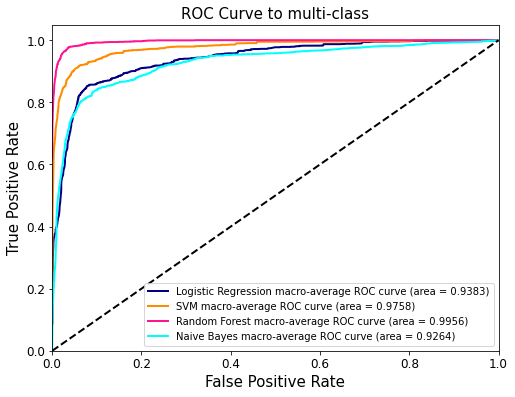

In [29]:
# Plot all ROC curves
plt.figure(figsize=(8,6))
#Logistic Regression
# plt.plot(fpr_lg["micro"], tpr_lg["micro"],
#          label='LG micro-average ROC curve (area = {0:0.2f})'
#                ''.format(roc_auc_lg["micro"]),
#          color='deeppink', linewidth=2)

plt.plot(fpr_lg["macro"], tpr_lg["macro"],
         label='Logistic Regression macro-average ROC curve (area = {0:0.4f})'
               ''.format(roc_auc_lg["macro"]),
         color='navy', linewidth=2)

#SVM
# plt.plot(fpr_svm["micro"], tpr_svm["micro"],
#          label='SVM micro-average ROC curve (area = {0:0.2f})'
#                ''.format(roc_auc_svm["micro"]),
#          color='aqua', linewidth=2)

plt.plot(fpr_svm["macro"], tpr_svm["macro"],
         label='SVM macro-average ROC curve (area = {0:0.4f})'
               ''.format(roc_auc_svm["macro"]),
         color='darkorange', linewidth=2)

#Random Forest
# plt.plot(fpr_rf["micro"], tpr_rf["micro"],
#          label='Random Forest micro-average ROC curve (area = {0:0.4f})'
#                ''.format(roc_auc_rf["micro"]),
#          color='aqua', linewidth=2)

plt.plot(fpr_rf["macro"], tpr_rf["macro"],
         label='Random Forest macro-average ROC curve (area = {0:0.4f})'
               ''.format(roc_auc_rf["macro"]),
         color='deeppink', linewidth=2)

#Naive Bayes
# plt.plot(fpr_nb["micro"], tpr_nb["micro"],
#          label='Random Forest micro-average ROC curve (area = {0:0.4f})'
#                ''.format(roc_auc_nb["micro"]),
#          color='aqua', linewidth=2)

plt.plot(fpr_nb["macro"], tpr_nb["macro"],
         label='Naive Bayes macro-average ROC curve (area = {0:0.4f})'
               ''.format(roc_auc_nb["macro"]),
         color='aqua', linewidth=2)

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('False Positive Rate',fontsize=15)
plt.ylabel('True Positive Rate',fontsize=15)
plt.title('ROC Curve to multi-class',fontsize=15)
plt.legend(loc="lower right")
plt.show()